2024-08-23 00:54:09.227 | INFO     | datasets.wildfire_data_module:split_data:77 - Splitting data...
2024-08-23 00:54:09.229 | INFO     | datasets.wildfire_data_module:split_data:93 - Train input data folders: 1
2024-08-23 00:54:09.230 | INFO     | datasets.wildfire_data_module:split_data:94 - Train target folders: 1
2024-08-23 00:54:09.231 | INFO     | datasets.wildfire_data_module:split_data:95 - Test input data folders: 0
2024-08-23 00:54:09.232 | INFO     | datasets.wildfire_data_module:split_data:96 - Test target folders: 0
2024-08-23 00:54:09.237 | INFO     | datasets.wildfire_data_module:split_data:99 - Train input files: 469
2024-08-23 00:54:09.242 | INFO     | datasets.wildfire_data_module:split_data:101 - Train target files: 469
2024-08-23 00:54:09.244 | INFO     | datasets.wildfire_data_module:split_data:104 - Test input files: 0
2024-08-23 00:54:09.245 | INFO     | datasets.wildfire_data_module:split_data:106 - Test target files: 0
2024-08-23 00:54:09.246 | INFO     | datas

Showing preview of a few batches from the training dataloader...
X Batch Shape: torch.Size([4, 2, 256, 256]), Y Batch Shape: torch.Size([4, 256, 256])


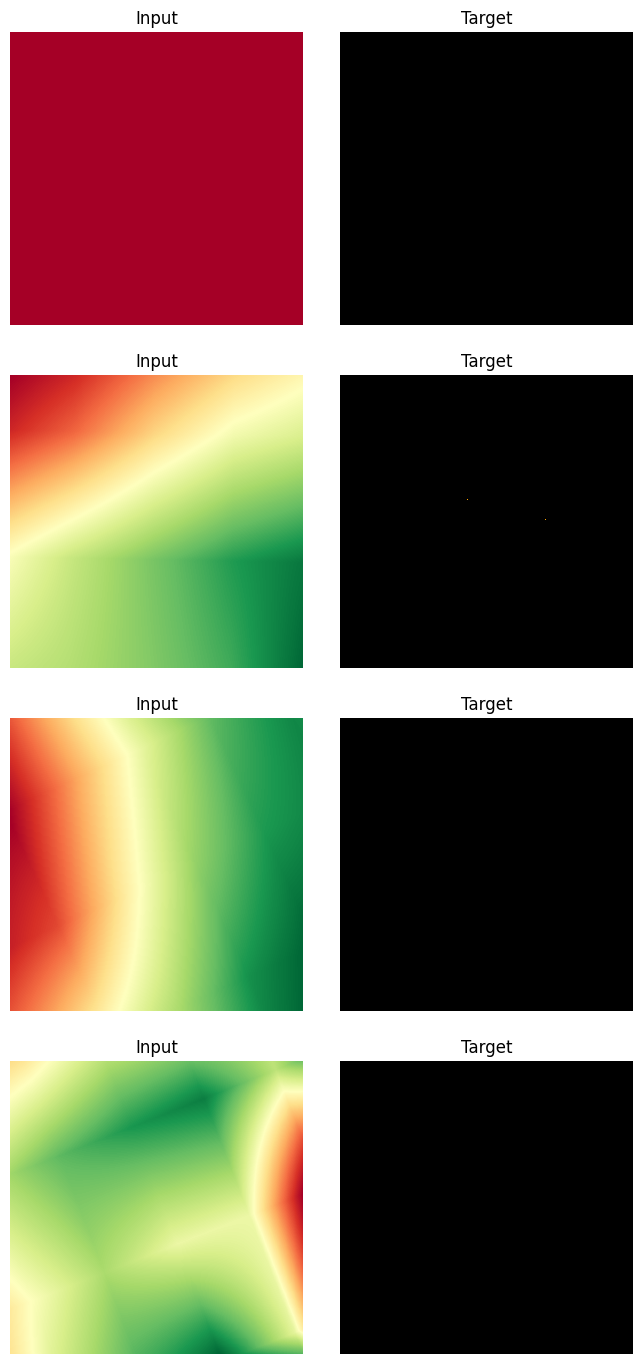

X Batch Shape: torch.Size([4, 2, 256, 256]), Y Batch Shape: torch.Size([4, 256, 256])


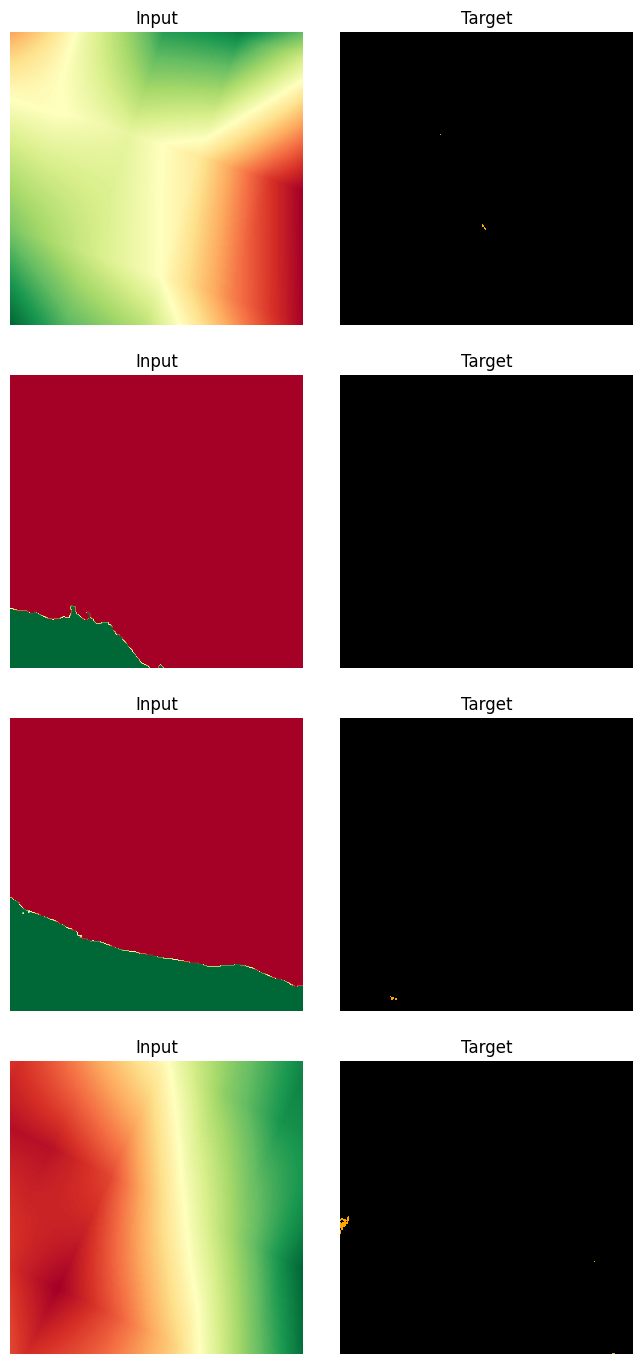

X Batch Shape: torch.Size([4, 2, 256, 256]), Y Batch Shape: torch.Size([4, 256, 256])


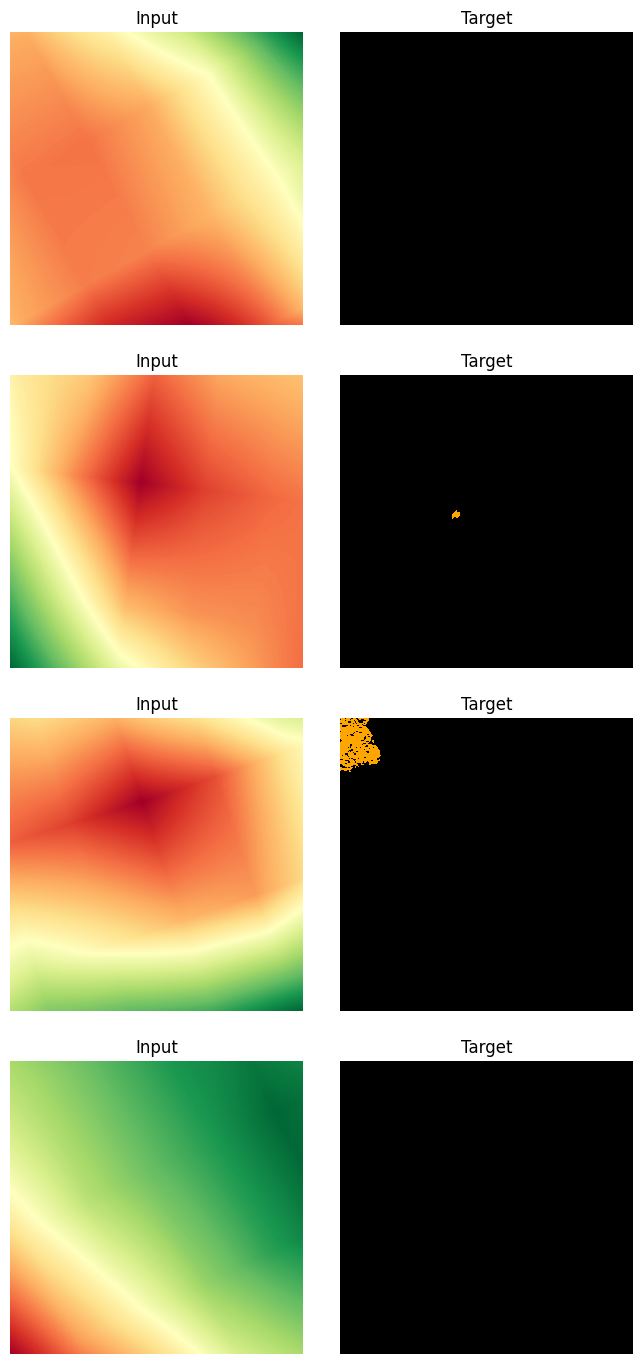

X Batch Shape: torch.Size([4, 2, 256, 256]), Y Batch Shape: torch.Size([4, 256, 256])


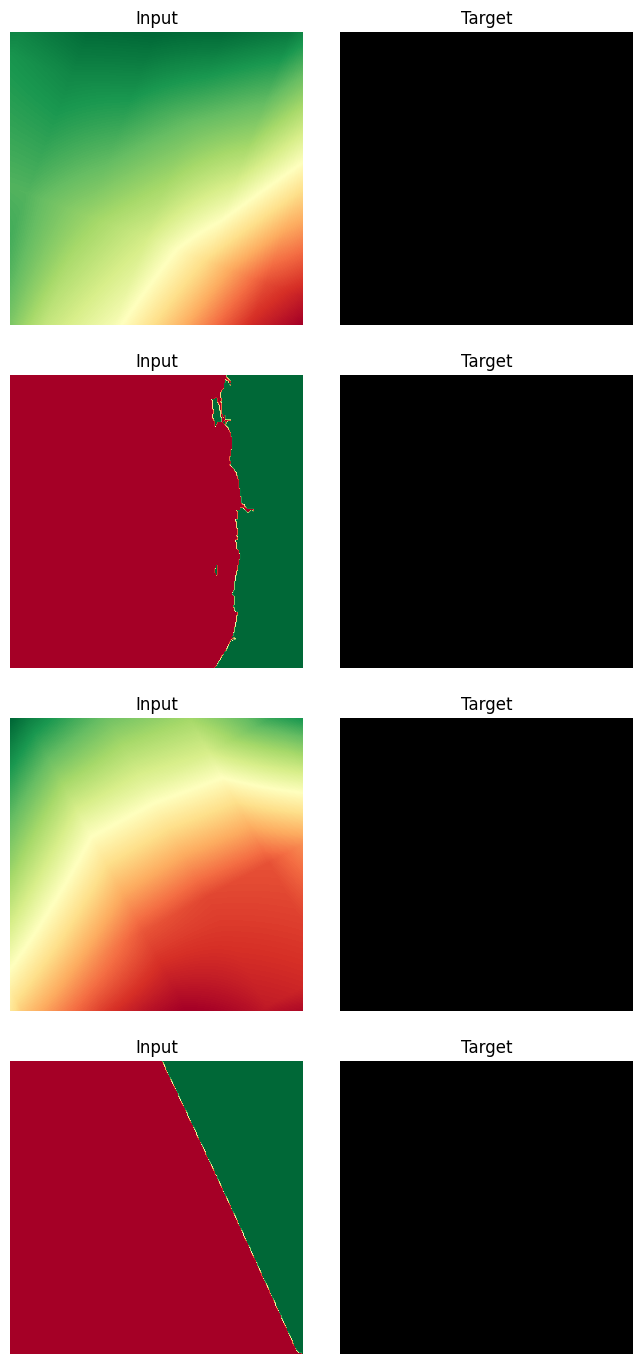

X Batch Shape: torch.Size([4, 2, 256, 256]), Y Batch Shape: torch.Size([4, 256, 256])


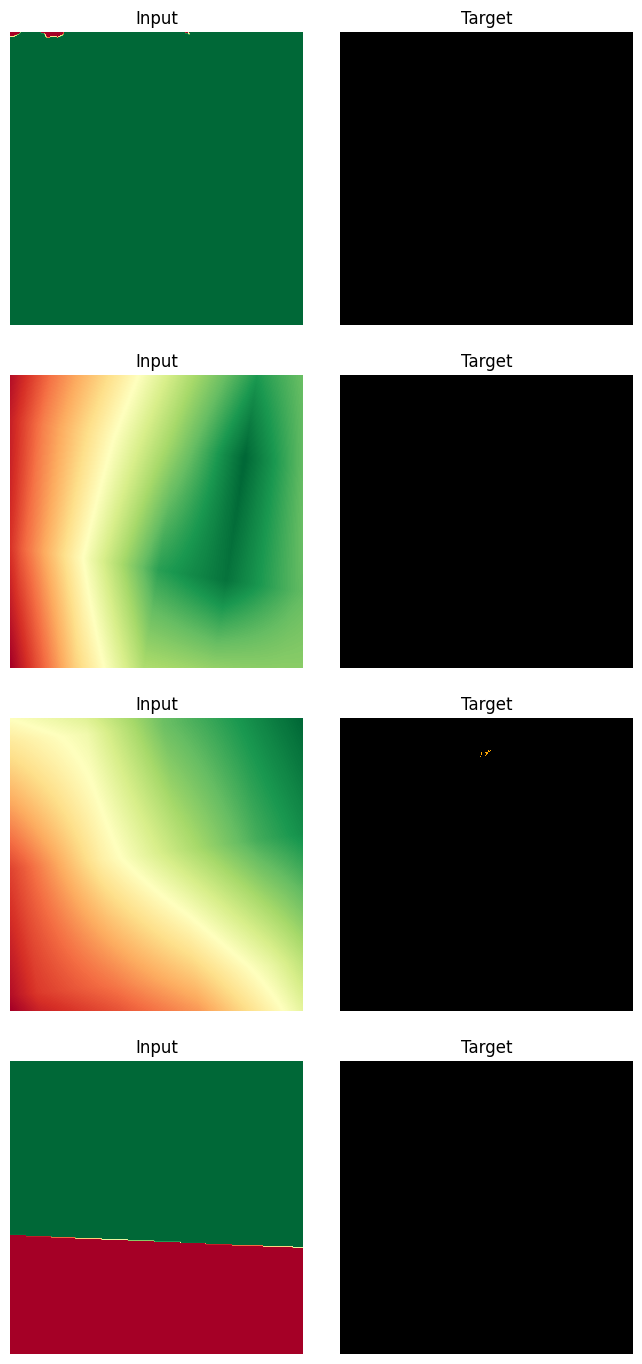

Showing preview of a few batches from the validation dataloader...
X Batch Shape: torch.Size([4, 2, 256, 256]), Y Batch Shape: torch.Size([4, 256, 256])


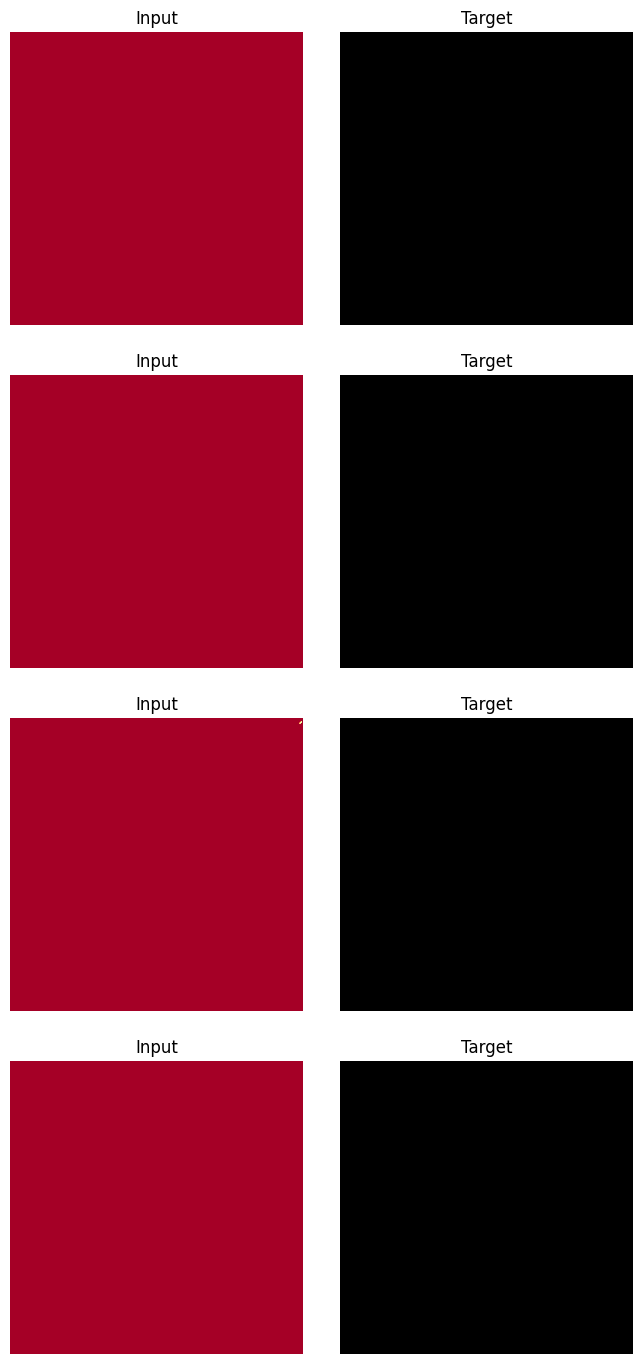

X Batch Shape: torch.Size([4, 2, 256, 256]), Y Batch Shape: torch.Size([4, 256, 256])


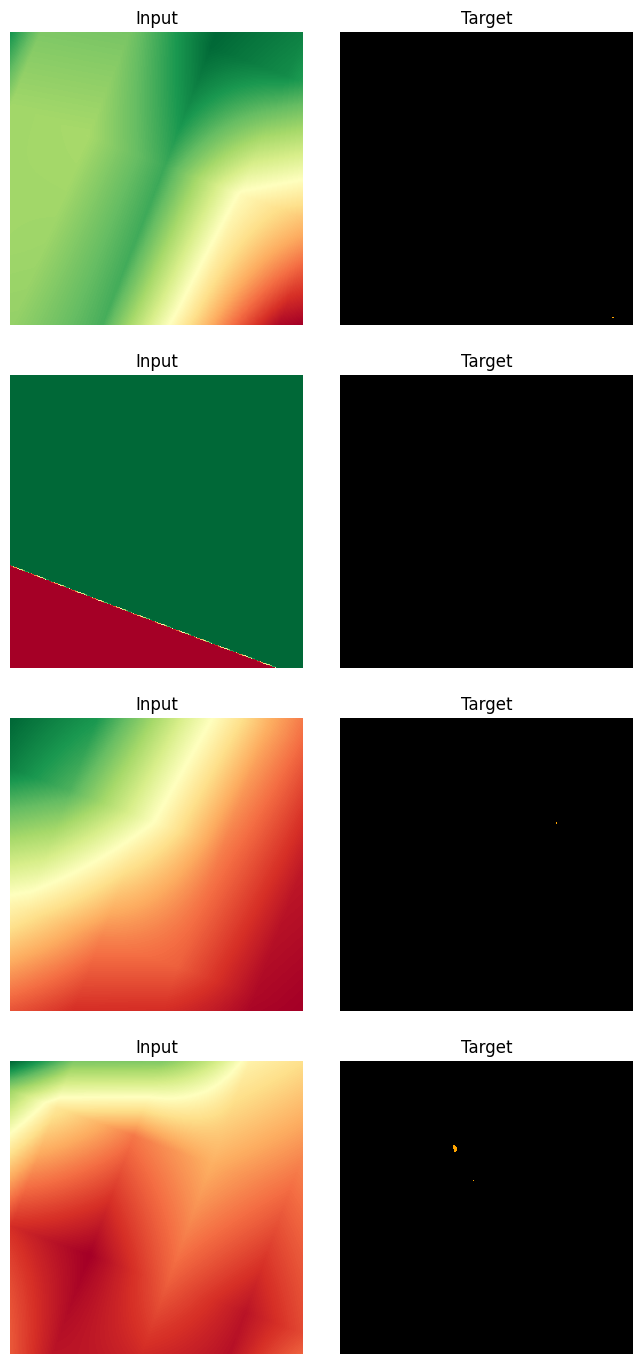

X Batch Shape: torch.Size([4, 2, 256, 256]), Y Batch Shape: torch.Size([4, 256, 256])


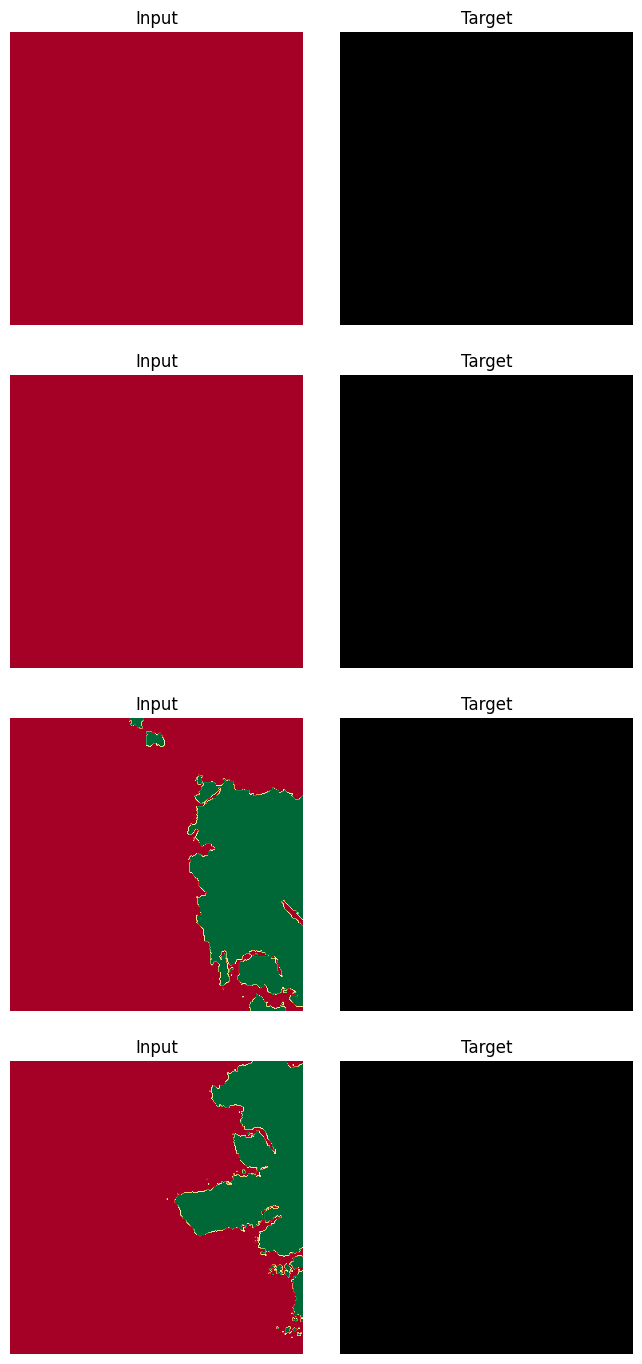

X Batch Shape: torch.Size([4, 2, 256, 256]), Y Batch Shape: torch.Size([4, 256, 256])


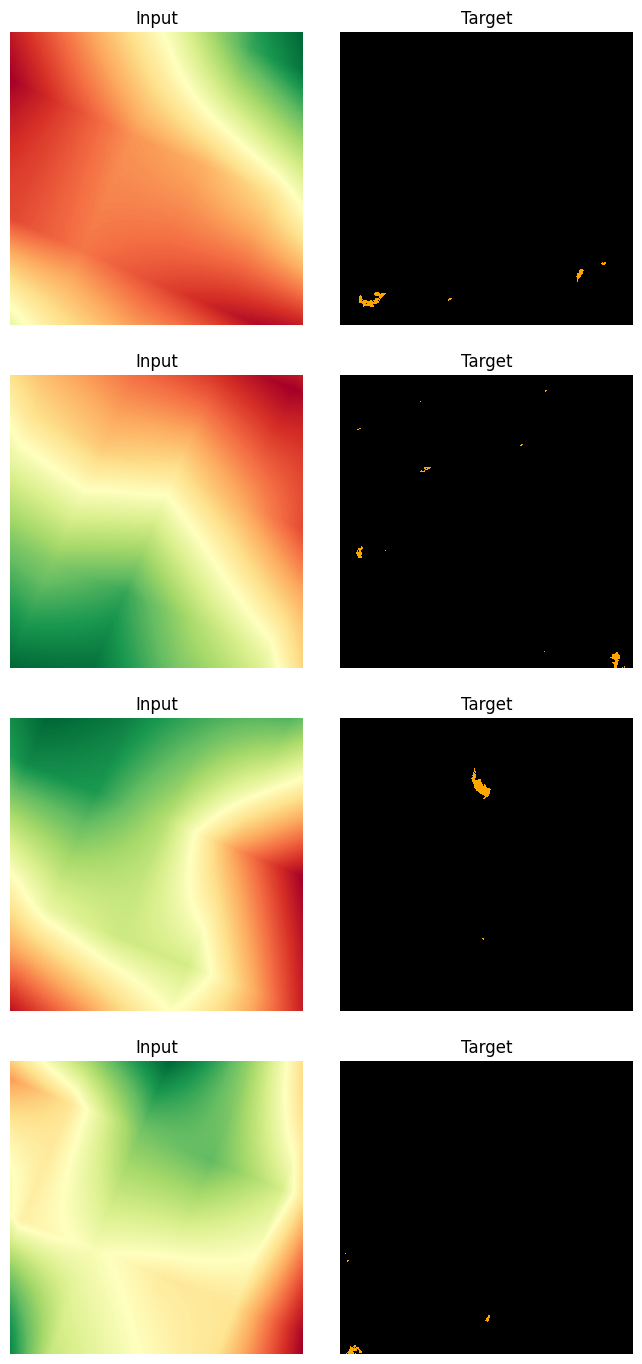

X Batch Shape: torch.Size([4, 2, 256, 256]), Y Batch Shape: torch.Size([4, 256, 256])


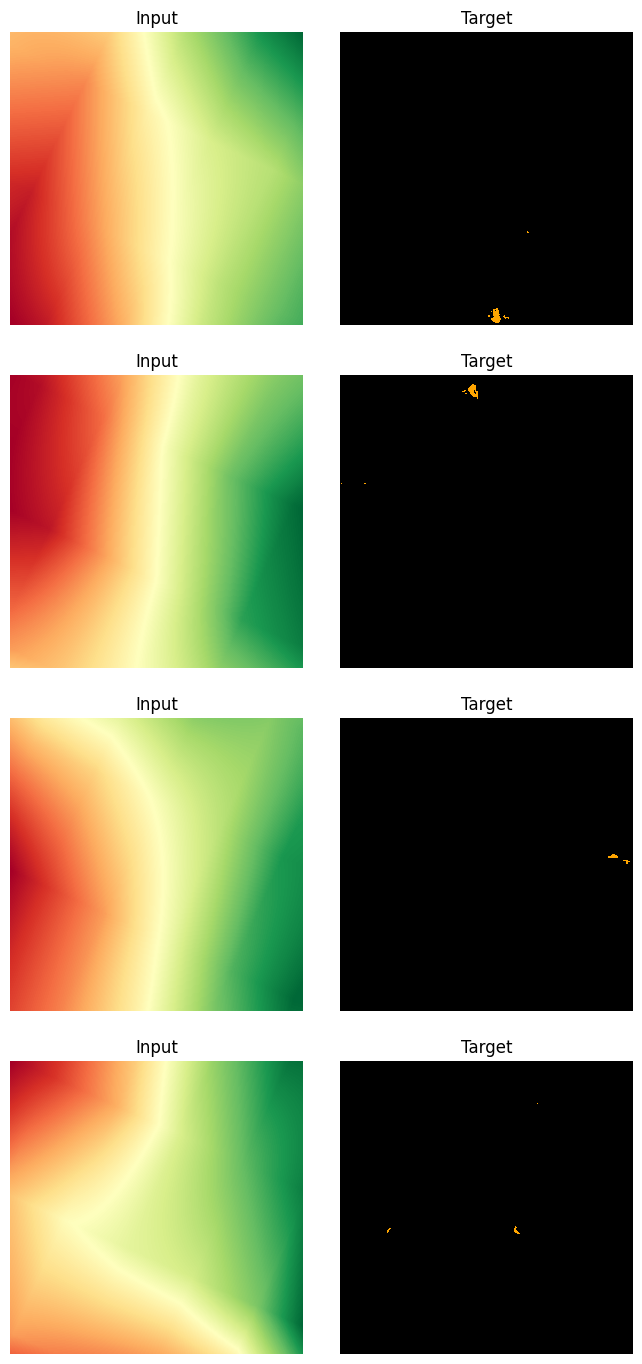

In [1]:
import matplotlib.pyplot as plt
import os
import tempfile
import torch
from datasets.wildfire_data_module import WildfireDataModule
from pathlib import Path
from matplotlib.colors import ListedColormap

# SET ACCORDING TO YOUR CONDA/MICROMAMBA ENV
os.environ['PROJ_LIB'] = '/home/user/micromamba/envs/wildfire/share/proj/'

# SET TO YOUR DATA PATHS (eg: path to datasets/eca32e80-f562-4e18-a015-57b2b27e3f68/input_data/2023_2023)
input_data_periods_folders_paths=[Path('/home/user/Documents/WildfirePrediction/data/datasets/eca32e80-f562-4e18-a015-57b2b27e3f68/input_data/2023_2023')]

# SET TO YOUR DATA PATHS (eg: path to datasets/eca32e80-f562-4e18-a015-57b2b27e3f68/target/2023_2023)
target_periods_folders_paths=[Path('/home/user/Documents/WildfirePrediction/data/datasets/eca32e80-f562-4e18-a015-57b2b27e3f68/target/2023_2023')]

fire_cmap = ListedColormap(['black', 'orange'])

preview_batch_size = 4

def show_preview(data_loader, fire_cmap):
    max_batches = 5
    batch_number = 0
    for data in data_loader:
        x, y = data.images, data.masks
        print(f"X Batch Shape: {x.shape}, Y Batch Shape: {y.shape}")
        fig, axs = plt.subplots(nrows=x.shape[0], ncols=2, figsize=(7, 3.5 * x.shape[0]))
        for i in range(x.shape[0]):
            axs[i][0].imshow(torch.unsqueeze(x[i][0], -1).numpy(), cmap='RdYlGn')
            axs[i][1].imshow(torch.unsqueeze(y[i], -1).numpy(), cmap=fire_cmap)
            axs[i][0].set_title("Input", fontsize=12)
            axs[i][1].set_title("Target", fontsize=12)
            axs[i][0].axis('off')
            axs[i][1].axis('off')
        fig.tight_layout(pad=2.0)
        plt.show()
        batch_number += 1
        
        if batch_number >= max_batches:
            break

#tmpdirname = Path(tempfile.mkdtemp())
with tempfile.TemporaryDirectory() as tmpdirname:
    tmp_dir = Path(tmpdirname)
    data_module = WildfireDataModule(
        input_data_indexes_to_remove=[],
        seed=42,
        train_batch_size=preview_batch_size,
        eval_batch_size=preview_batch_size,
        model_input_size=256,
        input_data_new_no_data_value=-32768.0,
        input_data_periods_folders_paths=input_data_periods_folders_paths,
        target_periods_folders_paths=target_periods_folders_paths,
        train_periods=[range(2023, 2024)],
        val_split=0.2,
        preprocessing_num_workers=2,
        output_folder_path=tmp_dir,
        data_loading_num_workers=1
    )

    data_module.split_data()

    data_module.setup(stage='fit')

    train_dl = data_module.train_dataloader()
    print("Showing preview of a few batches from the training dataloader...")
    show_preview(train_dl, fire_cmap)

    val_dl = data_module.val_dataloader()
    print("Showing preview of a few batches from the validation dataloader...")
    show_preview(val_dl, fire_cmap)